## Support Vector Machines

1. What is SVM?
* Commonly used for classification, specifically binary classification as SVM typically classify data into two groups. For multiclass classification, SVM can still be used, but that means you'd need multiple SVMs. 

* SVMs can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). However, this is not a common approach for regression.

2. Key concepts of SVM?
* Hyperplane: In SVM classification, the objective is to find a hyperplane that could separate the data points to their corresponding classes. You can think of it as a plane that is located in between two groups of data points to distinguish them.

* Support Vectors: points that are closest to the hyperplane. These are considered "support" vectors as they would influence the position and orientation of the hyperplane. These support vectors will also maximize the margin between the hyperplane.


* Kernel: A tool used by SVM to convert the input space into a higher-dimensional space. There are several kernel functions to choose from, for instance, linear, polynomial and radial basis function (RBF).

3. How does it work exactly?

In the end, we are trying to find the hyperplane with maximized margin, while classifying as many correct data inputs as possible. This can be done using support vectors, which can be formulated as an optimization task. Lagrange multipliers are used to solve this constrained optimization task. Essentially, the maximization will depend only on the dot product of pairs of support vectors. More math info can be found [here](https://towardsdatascience.com/understanding-support-vector-machine-part-1-lagrange-multipliers-5c24a52ffc5e)


4. Pros and cons of SVM?
    * Pros: 
    1. It works really well with a clear margin of separation. 
    2. It is effective in high dimensional spaces.
    3. SVM is effective in cases where the number of dimensions is greater than the number of samples.
    4. SVM is relatively memory efficient

    * Cons: 
    1. It doesn't perform well when we have large data set because the required training time is higher.
    2. SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
    3. In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
    4. As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.
    
    
Let's start with some data from Kaggle. The dataset for this notebook will be from [here](https://www.kaggle.com/imrandude/olivetti)

### 1. Imports and inspecting data

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

#System
import os
print(os.listdir("./svm_data/"))

['olivetti_faces.npy', 'olivetti_faces_target.npy']


In [33]:
# An NPY file is a NumPy array file, in binary format
data=np.load("./svm_data/olivetti_faces.npy")
target=np.load("./svm_data/olivetti_faces_target.npy")

In [34]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [35]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [58]:
# identities = np.unique(target)
# df = pd.DataFrame(target, columns = ["label"])

# for person_id in identities:
#     idx = list(df[df["label"] == person_id].index)

#     print("Person ", person_id)

#     fig = plt.figure(figsize = (20, 20))

#     imgs = data[idx]
#     for i, img in enumerate(imgs):
#         ax1 = fig.add_subplot(1, len(imgs), i+1)
#         plt.imshow(img, cmap='gray')
#         plt.axis('off')
    
#     plt.show()
#     print("-----------------------------------")
    
#     if person_id >= 3:
#         break

In [36]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

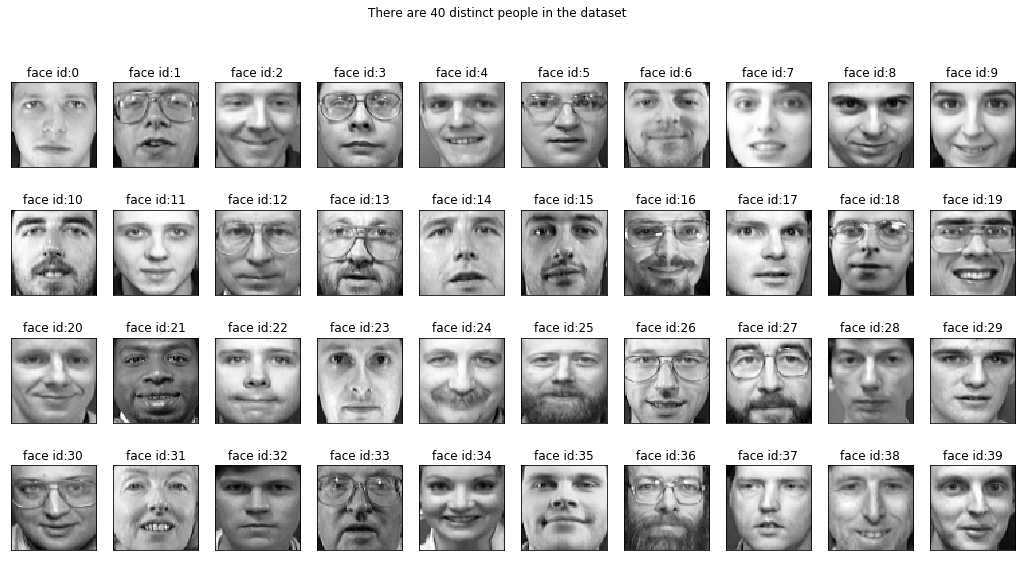

In [37]:
show_40_distinct_people(data, np.unique(target))

### 2. Data Modeling

In [38]:
# Check data size, notice that it is in matrix form, so it needs to be converted to vector
data.shape

(400, 64, 64)

In [39]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [40]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.2, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (320, 4096)
y_train shape:(320,)


In [41]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_train
y_frame.groupby(['subject ids']).size()

subject ids
0     8
1     8
2     8
3     8
4     8
5     8
6     8
7     8
8     8
9     8
10    8
11    8
12    8
13    8
14    8
15    8
16    8
17    8
18    8
19    8
20    8
21    8
22    8
23    8
24    8
25    8
26    8
27    8
28    8
29    8
30    8
31    8
32    8
33    8
34    8
35    8
36    8
37    8
38    8
39    8
dtype: int64

Each subject has 8 samples in the training dataset

In [42]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

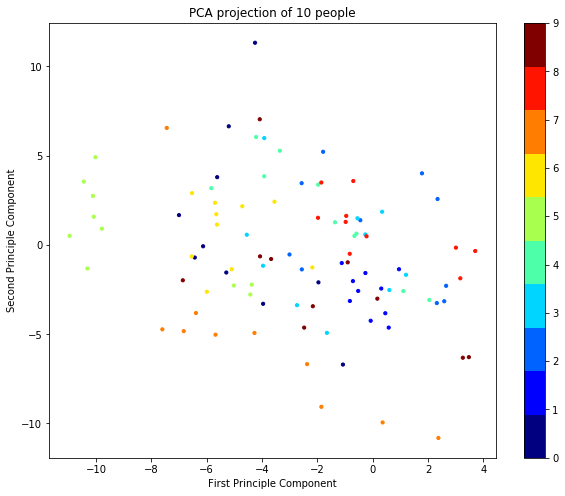

In [43]:
number_of_people=10

index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))

ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

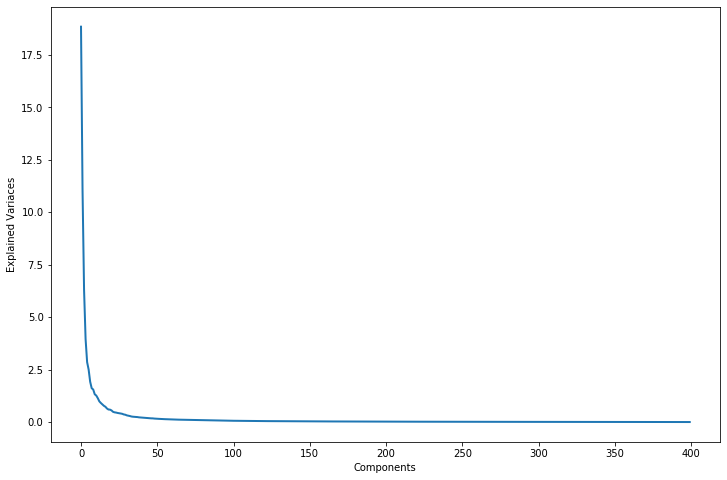

In [44]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In the figure above, it can be seen that 50 and more PCA components represent the same data. I will try using 50 components

In [45]:
n_components=50

pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=50, whiten=True)

Show Average Face

Text(0.5, 1.0, 'Average Face')

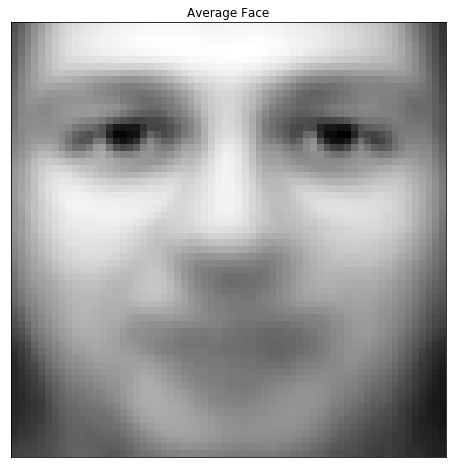

In [46]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

In [59]:
#Subtracting mean from all the samples
X = data
X = X.reshape((X.shape[0], X.shape[1]**2))
X = X - np.average(X, axis=0)

In [63]:
XtX = np.matmul(X.T, X)
print('XtX.shape:', XtX.shape)

XtX.shape: (4096, 4096)


In [64]:
C = (1/X.shape[0])*XtX

In [65]:
# Finding eigen vectors (which are also the orthonormal directions) of the covariance matrix.
from numpy import linalg as LA

w, v = LA.eig(C)

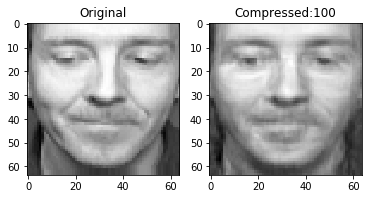

In [66]:
numComponents = 100
V = v[:,0:numComponents]
V.shape

person_id = 25
fig,a =  plt.subplots(1,2)
import numpy as np
x = np.arange(1,5)
a[0].imshow(avgFace + X[person_id].reshape(64,64), cmap='gray')
a[0].set_title('Original')

alphas = np.dot(V.T, X[person_id])
a[1].imshow(avgFace + np.dot(V, alphas).reshape(64,64), cmap='gray')
a[1].set_title('Compressed:' + str(numComponents))
plt.show()

Text(0.5, 0.98, 'All Eigen Faces')

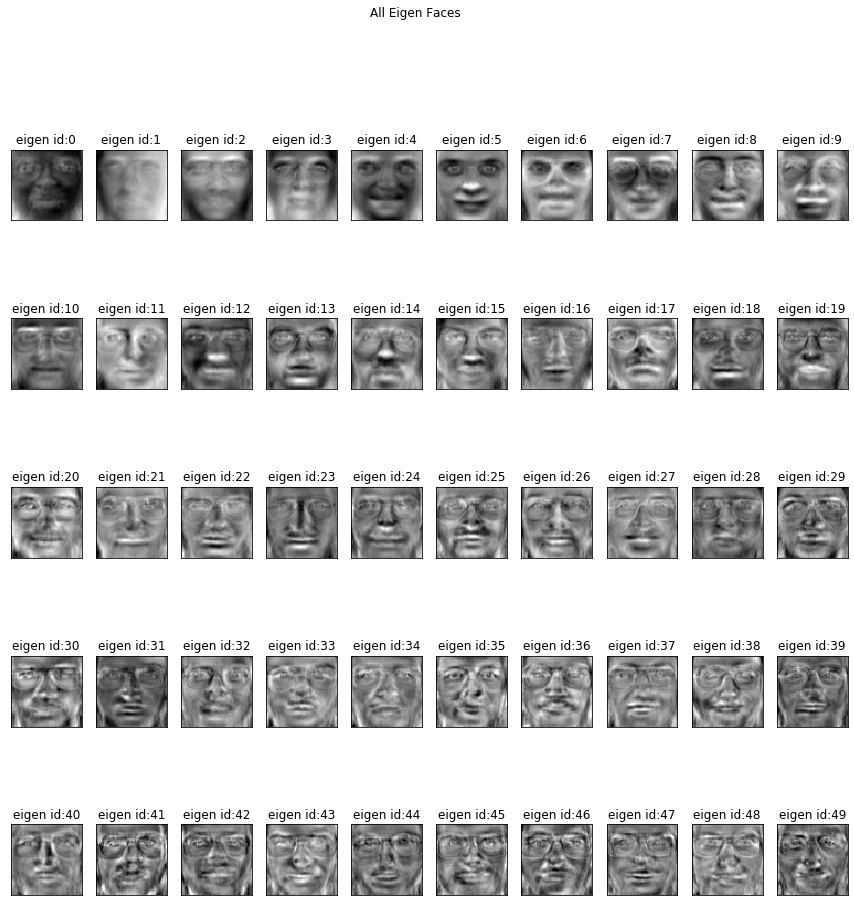

In [47]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [48]:
eigen_faces.shape

(50, 64, 64)

In [52]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [53]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.96


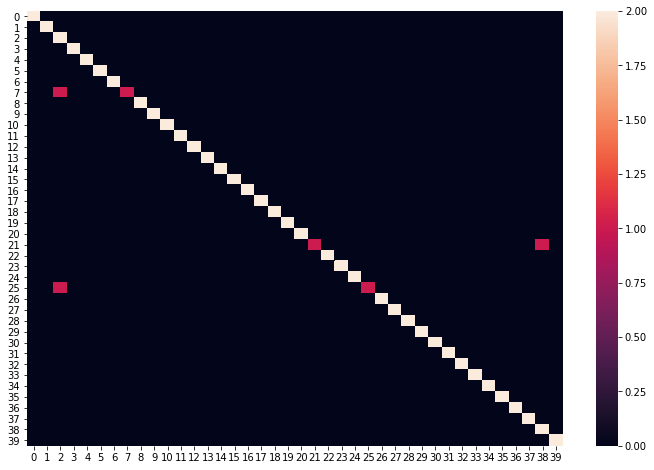

In [27]:
import seaborn as sns

plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [28]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

models = []
models.append(("SVM",SVC()))

pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)

for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    print(10*"=","{} Cross Val. Result".format(name).upper(),10*"=")
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

========== SVM CROSS VAL. RESULT ==========
SVM mean cross validations score:0.93
